In [ ]:
!pip install -U numpy

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
from datetime import datetime
import holidays
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
us_holidays=holidays.US()

In [2]:
df = pd.read_csv( "pirates_of_caribbean.csv")

df=df.dropna(subset=['SPOSTMIN'])
df = df[df['SPOSTMIN']>=0]
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])
df['time_pct'] = df.datetime.apply(lambda time: (time.hour * 60 + time.minute) / (24 * 60))

L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter','is_month_start','is_month_end','is_quarter_start']
df = df.join(pd.concat((getattr(df['date'].dt, i).rename(i) for i in L), axis=1))

def k(x):
    if x['Holiday']:
        return us_holidays.get(x['date'])
    else:
        return "NoHoliday"


In [ ]:
#This is analysis of the following:
#SPOSTMIN	Standby Posted Wait Time (in minutes) *
#SACTMIN	Actual Wait Time (in minutes)


In [75]:
df.head()

,date,datetime,SPOSTMIN,SACTMIN,time_pct,year,month,day,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start
3,2012-01-01,2012-01-01 13:56:00,NaN,5.0,0.580556,2012,1,1,6,1,52,1,True,False,True
5,2012-01-01,2012-01-01 20:10:00,NaN,2.0,0.840278,2012,1,1,6,1,52,1,True,False,True
6,2012-01-01,2012-01-01 20:10:00,NaN,2.0,0.840278,2012,1,1,6,1,52,1,True,False,True
9,2012-01-01,2012-01-01 21:41:00,NaN,1.0,0.903472,2012,1,1,6,1,52,1,True,False,True
11,2012-01-01,2012-01-01 22:45:00,NaN,1.0,0.947917,2012,1,1,6,1,52,1,True,False,True


In [3]:
##why so many bins
#target = df["SPOSTMIN"]
#bins=[0,1,2,3,4,5,6,8,10,12,14,15,18,20,25,30,35,40,45,60,90]
#labels=[0,1,2,3,4,5,6,8,10,12,14,15,18,20,25,30,35,40,45,60,90]
df['post_bin'] = pd.cut(df['SPOSTMIN'], [0,1,2,3,4,5,6,8,10,12,14,15,18,20,25,30,35,40,45,60,90],right=False)
#target = pd.get_dummies(df['post_bin'])

In [6]:
df['post_bin'].value_counts()

[5, 6)      55390
[10, 12)    40249
[45, 60)    30591
[20, 25)    21976
[15, 18)    21964
[30, 35)    20450
[25, 30)    20131
[35, 40)    16967
[40, 45)    16656
[60, 90)    10689
[0, 1)        171
[14, 15)        0
[8, 10)         0
[6, 8)          0
[18, 20)        0
[4, 5)          0
[3, 4)          0
[2, 3)          0
[1, 2)          0
[12, 14)        0
Name: post_bin, dtype: int64

In [ ]:
##why so many bins
#target = df["SPOSTMIN"]
bins=[0,14,29,44,59,89,149]
labels=['1','2','3','4','5','6']
df['labels'] = pd.cut(df['SPOSTMIN'], bins=bins,labels=labels,right=True)
#target = pd.get_dummies(df['post_bin'])

In [ ]:
# if df['SPOSTMIN']<=15:
#     return df['n_label']=='1'
# elif df['SPOSTMIN']>15 and df['SPOSTMIN']<=30:
#     return df['n_label']='2'
# elif df['SPOSTMIN']>30 and df['SPOSTMIN']<=45:
#     return df['n_label']='3'
# elif df['SPOSTMIN']>45 and df['SPOSTMIN']<=60:
#     return df['n_label']='4'
# elif df['SPOSTMIN']>60 and df['SPOSTMIN']<=90:
#     return df['n_label']='5'
# else df['SPOSTMIN']>90:
#     return df['n_label']='6'

In [80]:
def f(df):
    if df['SPOSTMIN']<=15:
        val='1'
    elif df['SPOSTMIN']>15 and df['SPOSTMIN']<=30:
        val='2'
    elif df['SPOSTMIN']>30 and df['SPOSTMIN']<=45:
        val='3'
    elif df['SPOSTMIN']>45 and df['SPOSTMIN']<=60:
        val='4'
    elif df['SPOSTMIN']>60 and df['SPOSTMIN']<=90:
        val='5'
    else:
        val='6'
    return val

In [8]:
df['n_label'] = df.apply(f, axis=1)

In [9]:
df.head(50)

,date,datetime,SPOSTMIN,SACTMIN,time_pct,year,month,day,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,post_bin,n_label
0,2012-01-01,2012-01-01 10:14:00,5.0,NaN,0.426389,2012,1,1,6,1,52,1,True,False,True,"[5, 6)",1
1,2012-01-01,2012-01-01 12:13:00,5.0,NaN,0.509028,2012,1,1,6,1,52,1,True,False,True,"[5, 6)",1
2,2012-01-01,2012-01-01 13:50:00,10.0,NaN,0.576389,2012,1,1,6,1,52,1,True,False,True,"[10, 12)",1
4,2012-01-01,2012-01-01 14:42:00,10.0,NaN,0.612500,2012,1,1,6,1,52,1,True,False,True,"[10, 12)",1
7,2012-01-01,2012-01-01 20:40:00,5.0,NaN,0.861111,2012,1,1,6,1,52,1,True,False,True,"[5, 6)",1
8,2012-01-01,2012-01-01 21:40:00,5.0,NaN,0.902778,2012,1,1,6,1,52,1,True,False,True,"[5, 6)",1
10,2012-01-01,2012-01-01 22:06:00,0.0,NaN,0.920833,2012,1,1,6,1,52,1,True,False,True,"[0, 1)",1
12,2012-01-01,2012-01-02 01:52:00,5.0,NaN,0.077778,2012,1,1,6,1,52,1,True,False,True,"[5, 6)",1
14,2012-01-01,2012-01-02 02:06:00,5.0,NaN,0.087500,2012,1,1,6,1,52,1,True,False,True,"[5, 6)",1
15,2012-01-02,2012-01-02 09:58:00,5.0,NaN,0.415278,2012,1,2,0,2,1,1,False,False,False,"[5, 6)",1


In [10]:
df['n_label'].value_counts()

1    117774
2     62557
3     48035
4     21292
5      5808
6       281
Name: n_label, dtype: int64

In [11]:
df['n_label'].shape

(255747,)

In [46]:
df['SPOSTMIN'].value_counts()

5.0      55390
10.0     40249
20.0     21976
15.0     21964
30.0     20450
25.0     20131
35.0     16967
40.0     16656
45.0     14412
50.0     10152
55.0      6027
60.0      5113
65.0      2573
70.0      1375
75.0       918
80.0       458
85.0       252
90.0       232
0.0        171
95.0       155
105.0       53
110.0       20
120.0       19
100.0       12
115.0       11
125.0       10
150.0        1
Name: SPOSTMIN, dtype: int64

In [55]:
#df.to_csv('disneybins3.csv')

In [50]:
df['SPOSTMIN'].to_csv('disneybins2.csv')

In [52]:
df['SPOSTMIN'].head()

0     5.0
1     5.0
2    10.0
4    10.0
7     5.0
Name: SPOSTMIN, dtype: float64

In [59]:
col_names=['timeslots','numberofriders']

In [61]:
disneyplot=pd.read_csv('disneybins2.csv', names=col_names, header=None)

In [65]:
disneyplot.head()

,timeslots,numberofriders
0,0,5.0
1,1,5.0
2,2,10.0
3,4,10.0
4,7,5.0


In [62]:
df['SPOSTMIN'].head()

0     5.0
1     5.0
2    10.0
4    10.0
7     5.0
Name: SPOSTMIN, dtype: float64

In [66]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = disneyplot.timeslots.values.reshape(-1, 1)
y = disneyplot.numberofriders.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (255747, 1) (255747, 1)


array([[     0],
       [     1],
       [     2],
       ...,
       [282979],
       [282980],
       [282981]], dtype=int64)

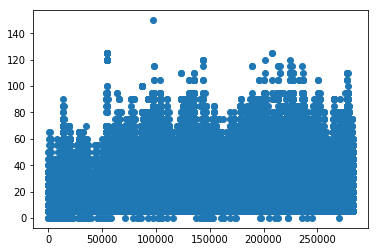

In [67]:
# Plot the data

### BEGIN SOLUTION

plt.scatter(X, y)

### END SOLUTION

In [10]:
# Create the model and fit the model to the data

#from sklearn.linear_model import LinearRegression
#changed to Random Forest
from sklearn.ensemble import RandomForestRegressor

In [12]:
from sklearn.datasets import make_regression

In [13]:
X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)

In [14]:

### BEGIN SOLUTION

#model = LinearRegression()
model1= RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100) 

### END SOLUTION

In [15]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

### BEGIN SOLUTION

#model.fit(X, y)
model1.fit(X, y)

### END SOLUTION

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [19]:
print(model1.feature_importances_)

[0.18146984 0.81473937 0.00145312 0.00233767]


In [20]:
print(model1.predict([[0, 0, 0, 0]]))

[-8.32987858]


In [74]:
df = pd.read_csv( "pirates_of_caribbean.csv")

df=df.dropna(subset=['SACTMIN'])
df = df[df['SACTMIN']>=0]
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])
df['time_pct'] = df.datetime.apply(lambda time: (time.hour * 60 + time.minute) / (24 * 60))

L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter','is_month_start','is_month_end','is_quarter_start']
df = df.join(pd.concat((getattr(df['date'].dt, i).rename(i) for i in L), axis=1))

def k(x):
    if x['Holiday']:
        return us_holidays.get(x['date'])
    else:
        return "NoHoliday"

In [76]:
df.head()

,date,datetime,SPOSTMIN,SACTMIN,time_pct,year,month,day,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start
3,2012-01-01,2012-01-01 13:56:00,NaN,5.0,0.580556,2012,1,1,6,1,52,1,True,False,True
5,2012-01-01,2012-01-01 20:10:00,NaN,2.0,0.840278,2012,1,1,6,1,52,1,True,False,True
6,2012-01-01,2012-01-01 20:10:00,NaN,2.0,0.840278,2012,1,1,6,1,52,1,True,False,True
9,2012-01-01,2012-01-01 21:41:00,NaN,1.0,0.903472,2012,1,1,6,1,52,1,True,False,True
11,2012-01-01,2012-01-01 22:45:00,NaN,1.0,0.947917,2012,1,1,6,1,52,1,True,False,True


In [77]:
##why so many bins
#target = df["SPOSTMIN"]
#bins=[0,1,2,3,4,5,6,8,10,12,14,15,18,20,25,30,35,40,45,60,90]
#labels=[0,1,2,3,4,5,6,8,10,12,14,15,18,20,25,30,35,40,45,60,90]
df['post_bin'] = pd.cut(df['SACTMIN'], [0,1,2,3,4,5,6,8,10,12,14,15,18,20,25,30,35,40,45,60,90],right=False)
#target = pd.get_dummies(df['post_bin'])

In [78]:
df['post_bin'].value_counts()

[20, 25)    1226
[15, 18)    1043
[2, 3)       898
[25, 30)     861
[12, 14)     767
[10, 12)     738
[6, 8)       705
[8, 10)      697
[3, 4)       618
[18, 20)     598
[30, 35)     557
[1, 2)       505
[4, 5)       482
[5, 6)       386
[14, 15)     346
[35, 40)     322
[45, 60)     213
[40, 45)     200
[0, 1)       182
[60, 90)      37
Name: post_bin, dtype: int64

In [79]:
##why so many bins
#target = df["SPOSTMIN"]
bins=[0,14,29,44,59,89,149]
labels=['1','2','3','4','5','6']
df['labels'] = pd.cut(df['SACTMIN'], bins=bins,labels=labels,right=True)
#target = pd.get_dummies(df['post_bin'])

In [81]:
def f(df):
    if df['SACTMIN']<=15:
        val='1'
    elif df['SACTMIN']>15 and df['SACTMIN']<=30:
        val='2'
    elif df['SACTMIN']>30 and df['SACTMIN']<=45:
        val='3'
    elif df['SACTMIN']>45 and df['SACTMIN']<=60:
        val='4'
    elif df['SACTMIN']>60 and df['SACTMIN']<=90:
        val='5'
    else:
        val='6'
    return val

In [82]:
df['n_label'] = df.apply(f, axis=1)

In [83]:
df.head(50)

,date,datetime,SPOSTMIN,SACTMIN,time_pct,year,month,day,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,post_bin,labels,n_label
3,2012-01-01,2012-01-01 13:56:00,NaN,5.0,0.580556,2012,1,1,6,1,52,1,True,False,True,"[5, 6)",1,1
5,2012-01-01,2012-01-01 20:10:00,NaN,2.0,0.840278,2012,1,1,6,1,52,1,True,False,True,"[2, 3)",1,1
6,2012-01-01,2012-01-01 20:10:00,NaN,2.0,0.840278,2012,1,1,6,1,52,1,True,False,True,"[2, 3)",1,1
9,2012-01-01,2012-01-01 21:41:00,NaN,1.0,0.903472,2012,1,1,6,1,52,1,True,False,True,"[1, 2)",1,1
11,2012-01-01,2012-01-01 22:45:00,NaN,1.0,0.947917,2012,1,1,6,1,52,1,True,False,True,"[1, 2)",1,1
13,2012-01-01,2012-01-02 01:52:00,NaN,1.0,0.077778,2012,1,1,6,1,52,1,True,False,True,"[1, 2)",1,1
39,2012-01-03,2012-01-03 18:54:00,NaN,17.0,0.787500,2012,1,3,1,3,1,1,False,False,False,"[15, 18)",2,2
44,2012-01-04,2012-01-04 14:51:00,NaN,20.0,0.618750,2012,1,4,2,4,1,1,False,False,False,"[20, 25)",2,2
45,2012-01-04,2012-01-04 14:51:00,NaN,20.0,0.618750,2012,1,4,2,4,1,1,False,False,False,"[20, 25)",2,2
50,2012-01-04,2012-01-04 21:19:00,NaN,1.0,0.888194,2012,1,4,2,4,1,1,False,False,False,"[1, 2)",1,1


In [91]:
df['n_label'].value_counts()

1    6665
2    3524
3     976
4     180
5      36
6       6
Name: n_label, dtype: int64

In [92]:
df['n_label'].shape

(11387,)

In [94]:
df['SACTMIN'].value_counts()

2.0       898
3.0       618
1.0       505
4.0       482
10.0      393
12.0      390
5.0       386
13.0      377
17.0      373
8.0       359
7.0       357
6.0       348
14.0      346
11.0      345
15.0      341
9.0       338
16.0      329
19.0      304
18.0      294
21.0      268
22.0      254
20.0      252
23.0      248
25.0      211
26.0      207
24.0      204
0.0       182
27.0      167
28.0      142
30.0      137
         ... 
58.0       10
51.0       10
56.0       10
55.0        9
59.0        7
57.0        6
61.0        5
62.0        5
63.0        4
67.0        3
71.0        3
64.0        3
69.0        2
70.0        2
66.0        1
101.0       1
1640.0      1
91.0        1
82.0        1
94.0        1
74.0        1
78.0        1
86.0        1
68.0        1
97.0        1
60.0        1
73.0        1
72.0        1
99.0        1
79.0        1
Name: SACTMIN, Length: 84, dtype: int64

In [95]:
df['SACTMIN'].to_csv('disneybins4.csv')

In [96]:
df['SACTMIN'].head()

3     5.0
5     2.0
6     2.0
9     1.0
11    1.0
Name: SACTMIN, dtype: float64

In [97]:
col_names=['timeslots','actualriders']

In [98]:
adisneyplot=pd.read_csv('disneybins4.csv', names=col_names, header=None)

In [99]:
adisneyplot.head()

,timeslots,actualriders
0,3,5.0
1,5,2.0
2,6,2.0
3,9,1.0
4,11,1.0


In [100]:
df['SACTMIN'].head()

3     5.0
5     2.0
6     2.0
9     1.0
11    1.0
Name: SACTMIN, dtype: float64

In [101]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = adisneyplot.timeslots.values.reshape(-1, 1)
y = adisneyplot.actualriders.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (11387, 1) (11387, 1)


array([[     3],
       [     5],
       [     6],
       ...,
       [282911],
       [282968],
       [282971]], dtype=int64)

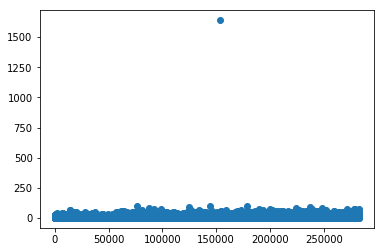

In [102]:
# Plot the data

### BEGIN SOLUTION

plt.scatter(X, y)

### END SOLUTION

In [21]:
# Create the model and fit the model to the data

#from sklearn.linear_model import LinearRegression
#changed to Random Forest
from sklearn.ensemble import RandomForestRegressor

In [22]:
from sklearn.datasets import make_regression

In [23]:
X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)

In [24]:
### BEGIN SOLUTION

#model = LinearRegression()
model1= RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100) 

### END SOLUTION

In [25]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

### BEGIN SOLUTION

#model.fit(X, y)
model1.fit(X, y)

### END SOLUTION

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [26]:
print(model1.feature_importances_)

[0.18146984 0.81473937 0.00145312 0.00233767]


In [27]:
print(model1.predict([[0, 0, 0, 0]]))

[-8.32987858]
